In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Sync the data
!rsync -r raven:/scratch/smavak/axlml/data/ data


Welcome to Raven, ARCCA's HPC System

This system is for authorised users, if you do not have authorised access 
please disconnect immediately and contact arcca@cardiff.ac.uk for assistance.

For new users please note the following:
 * the username contains only lowercase letters.
 * for security, the password field will stay empty whilst you type but it is
   being entered.



In [3]:
# Read in the parameters file
p_df = pd.read_csv("data/parameters.csv")
p_df.describe()

,noise,probend,repetitions,seed,size,turns
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.489555,0.499305,56.000000,79.500000,76.000000,100.968750
std,0.293069,0.272949,26.505962,46.332134,36.993965,58.406774
min,0.001849,0.008265,10.000000,0.000000,26.000000,1.000000
25%,0.219256,0.291687,33.000000,39.750000,39.750000,51.500000
50%,0.496847,0.453106,59.000000,79.500000,75.500000,96.000000
75%,0.722147,0.756832,77.000000,119.250000,104.750000,152.000000
max,0.998080,0.994796,99.000000,159.000000,133.000000,200.000000


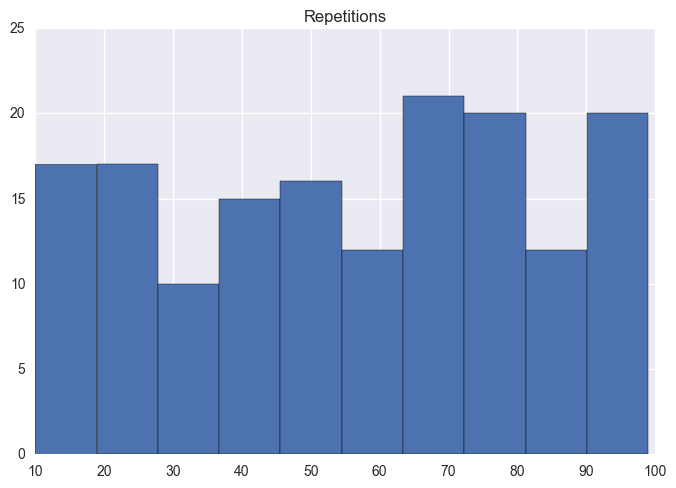

In [4]:
plt.hist(p_df.repetitions)
plt.title("Repetitions");

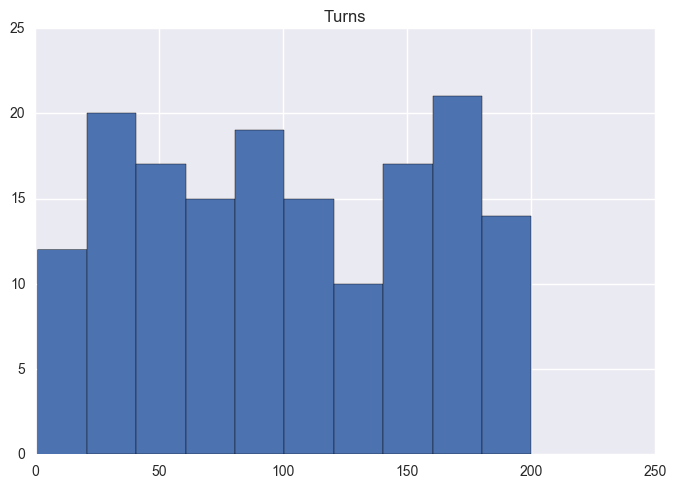

In [5]:
plt.hist(p_df.turns)
plt.title("Turns");

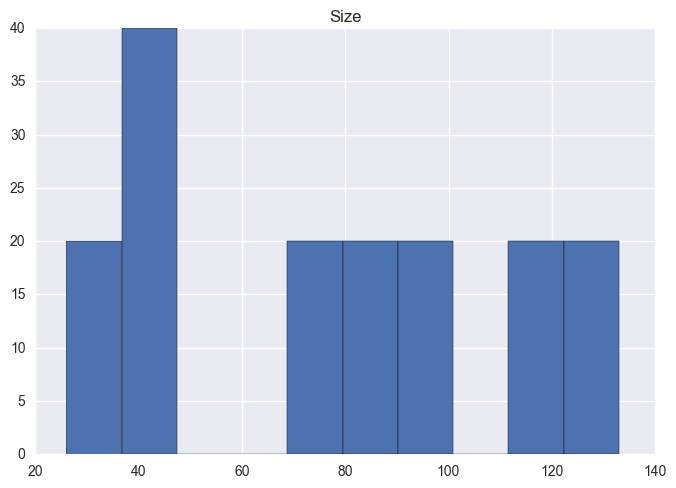

In [6]:
plt.hist(p_df['size'])
plt.title("Size");

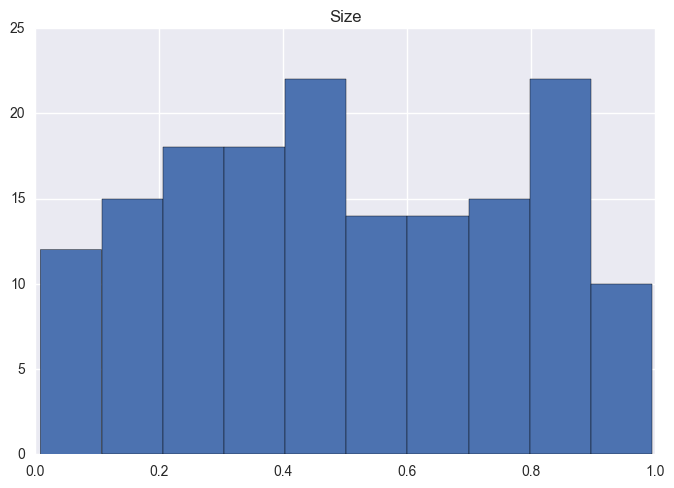

In [7]:
plt.hist(p_df['probend'])
plt.title("Size");